In [63]:
import pandas as pd
import geopandas
import numpy as np
from math import pi
from matplotlib import pyplot as plt
import seaborn as sns
import common.common_pandas_lib as common

## Configuraciones

In [64]:
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib


pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

### Configuraciones plot

In [65]:
TAM_TITULO = 35
TAM_ETIQUETA = 30

### Configuraciones de librerias

### Funciones auxiliares

In [66]:
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib

sns.set(style="whitegrid", font_scale = 2) # seteando tipo de grid en seaborn
                                           # seteando tamanio de ticks label
pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

def crear_radares_alineados(df, fil, col, paleta_colores):
    """
    PRE: Recibe :
        un dataframe con un index por cada radar que se
        vaya a hacer;
        la cantidad de filas del gráfico;
        la cantidad de columnas del gráfico;
        Ej: si pongo fil=2 y col=3, en una fila voy a
        tener 3 radares y en la siguiente fila 3 radares.
        la paleta de colores con la que se va a colorear
        el gráfico
    POST : Grafica fil * col radares o menos, según los
    datos del datagrame. Devuelve la figura.
    """
    
    # Categorias
    columnas = df.columns
    categorias = list(columnas[1:])
    N = len(categorias)
    
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angulos = [n / float(N) * 2 * pi for n in range(N)]
    angulos += angulos[:1]
    
    # Color
    paleta = plt.cm.get_cmap(paleta_colores, len(df.index))
    
    lista = []
    
    for fila in range(0, len(df.index)):
        color = paleta(fila)
        
        # Initialise the spider plot
        ax = plt.subplot(fil, col, fila + 1, polar=True, )
    
        # If you want the first axis to be on top:
        ax.set_theta_offset(pi / 2)
        ax.set_theta_direction(-1)
    
        # Draw one axe per variable + add labels labels yet
        plt.xticks(angulos[:-1], categorias, color='grey', size=15)
    
        # Draw ylabels
        ax.set_rlabel_position(0)
        plt.yticks([1,2,3,4], ["1","2","3","4"], color="grey", size=15)
        plt.ylim(0,4)
        
        # Ind1
        values=df.loc[fila].drop("provincia").values.flatten().tolist()
        values += values[:1]
        ax.plot(angulos, values, color=color, linewidth=1, linestyle='solid')
        ax.fill(angulos, values, color=color, alpha=0.4)
        
        #plt.title(df["provincia"][fila], size=TAM_ETIQUETA, color=color, y=1.1)
        plt.title("{}) {}".format(fila + 1, df["provincia"][fila]), size=TAM_ETIQUETA, color=color, y=1.1)
        
        lista.append(ax)
    
    fig, lista = plt.subplots(0)
    return fig

In [67]:
df = pd.read_csv('train.csv', \
       dtype = { \
                'id' : np.int32, \

                'ciudad' : 'category', \
                'antiguedad' : np.float16, \
                'habitaciones' : np.float16, \
                'garages' : np.float16, \
                'banos' : np.float16, \
                'metroscubiertos' : np.float16, \
                'metrostotales' : np.float16, \
                'idzona' : np.float32, \
                'gimnasio' : 'bool', \
                'usosmultiples' : 'bool', \
                'piscina' : 'bool', \
                'escuelascercanas' : 'bool', \
                'centroscomercialescercanos' : 'bool', \
                'precio' : np.float32 \
               },
        parse_dates = ['fecha'],
        date_parser = pd.to_datetime                                
    )

## Cantidad de NAN en campos a analizar

### Cantidad de NAN en provincia:

In [68]:
n_provincia_nan = df["provincia"].isnull().sum()
n_provincia_nan

155

### Cantidad de NAN en precio:

In [69]:
n_tipodepropiedad_nan = df["tipodepropiedad"].isnull().sum()
n_tipodepropiedad_nan

46

## ¿Cuáles son las provincias con propiedades más caras y cuáles con las más baratas?

In [70]:
provincia_precio = df.groupby('provincia')['precio'].mean()

(<Figure size 1000x600 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x16069ff5080>)

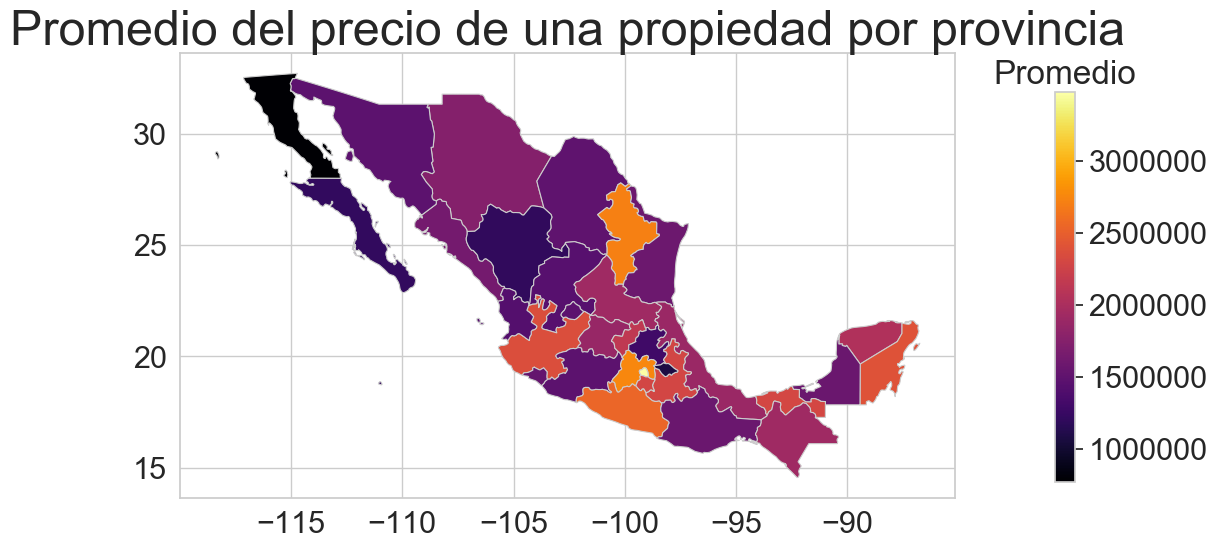

<Figure size 1250x1250 with 0 Axes>

In [71]:
common.crear_mapa(provincia_precio, "precio", provincia_precio.min(), provincia_precio.max(), "Promedio del precio de una propiedad por provincia", "Promedio", "inferno")

### Top 5 provincias con viviendas más caras

In [72]:
provincia_precio_df = provincia_precio.to_frame()
provincia_precio_df.rename(columns = {'precio': 'Precio promedio de propiedad'}, inplace=True)

In [73]:
provincias_caras = provincia_precio_df.nlargest(6, "Precio promedio de propiedad")
provincias_caras

,Precio promedio de propiedad
provincia,
Distrito Federal,"3,471,705.00"
Edo. de México,"2,762,465.00"
Nuevo León,"2,717,757.75"
Guerrero,"2,548,741.75"
Quintana Roo,"2,402,967.00"
Jalisco,"2,367,693.50"


### Top 5 estados con viviendas más baratas

In [74]:
provincias_baratas = provincia_precio_df.nsmallest(6, "Precio promedio de propiedad")
provincias_baratas

,Precio promedio de propiedad
provincia,
Baja California Norte,"767,441.75"
Tlaxcala,"1,080,993.38"
Durango,"1,210,389.00"
Baja California Sur,"1,216,452.88"
Hidalgo,"1,305,550.50"
Nayarit,"1,426,790.88"


## Promedios de las características de las propiedades por provincia

In [75]:
categorias = ["precio", "habitaciones", "banos", "garages"]

### Promedios de las caracteristicas de las provincias con propiedades más caras:

In [76]:
provincias_caras_df = df[df["provincia"].isin(list(provincias_caras.index))]
provincias_caras_df = provincias_caras_df.groupby("provincia")[categorias].mean()
provincias_caras_df = provincias_caras_df.sort_values("precio", ascending  = False)
provincias_caras_df = provincias_caras_df.drop(["precio"], axis=1)
provincias_caras_df
#df, edo, leon, guerrero, quinbtana, jalisco

,habitaciones,banos,garages
provincia,,,
Distrito Federal,2.74,1.99,1.42
Edo. de México,2.97,2.08,1.66
Nuevo León,2.94,2.31,1.53
Guerrero,2.82,2.29,1.33
Quintana Roo,2.85,2.34,1.58
Jalisco,3.03,2.22,1.53


<Figure size 640x480 with 0 Axes>

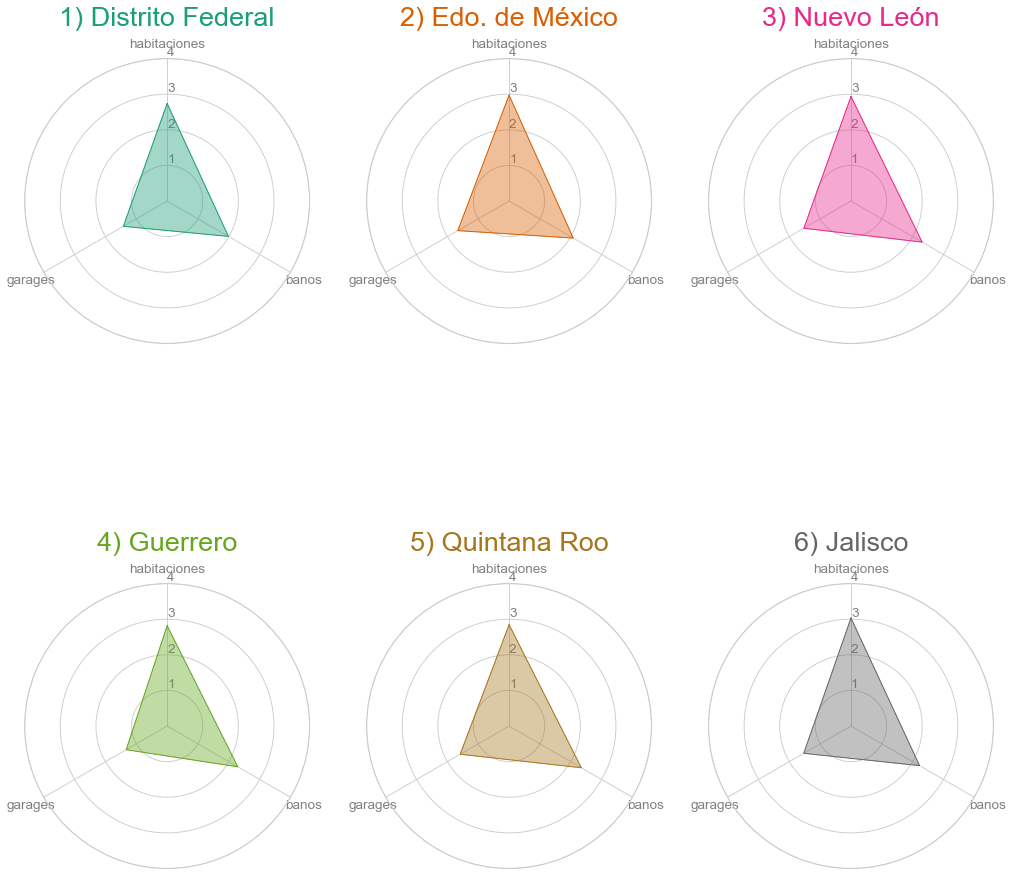

<Figure size 640x480 with 0 Axes>

In [77]:
my_dpi=65
plt.figure(figsize=(1250/my_dpi, 1250/my_dpi), dpi=my_dpi)
 
common.crear_radares_alineados(provincias_caras_df.reset_index(), 2, 3, "Dark2")

### Promedios de las caracteristicas de las provincias con propiedades más baratas:

In [78]:
provincias_baratas_df = df[df["provincia"].isin(list(provincias_baratas.index))]
provincias_baratas_df = provincias_baratas_df.groupby("provincia")[categorias].mean()
provincias_baratas_df = provincias_baratas_df.sort_values("precio")
provincias_baratas_df = provincias_baratas_df.drop(["precio"], axis=1)
provincias_baratas_df

,habitaciones,banos,garages
provincia,,,
Baja California Norte,2.58,1.37,1.61
Tlaxcala,2.83,1.55,1.38
Durango,3.05,1.95,1.47
Baja California Sur,2.63,1.61,1.68
Hidalgo,2.88,1.81,1.48
Nayarit,2.75,1.89,0.89


<Figure size 640x480 with 0 Axes>

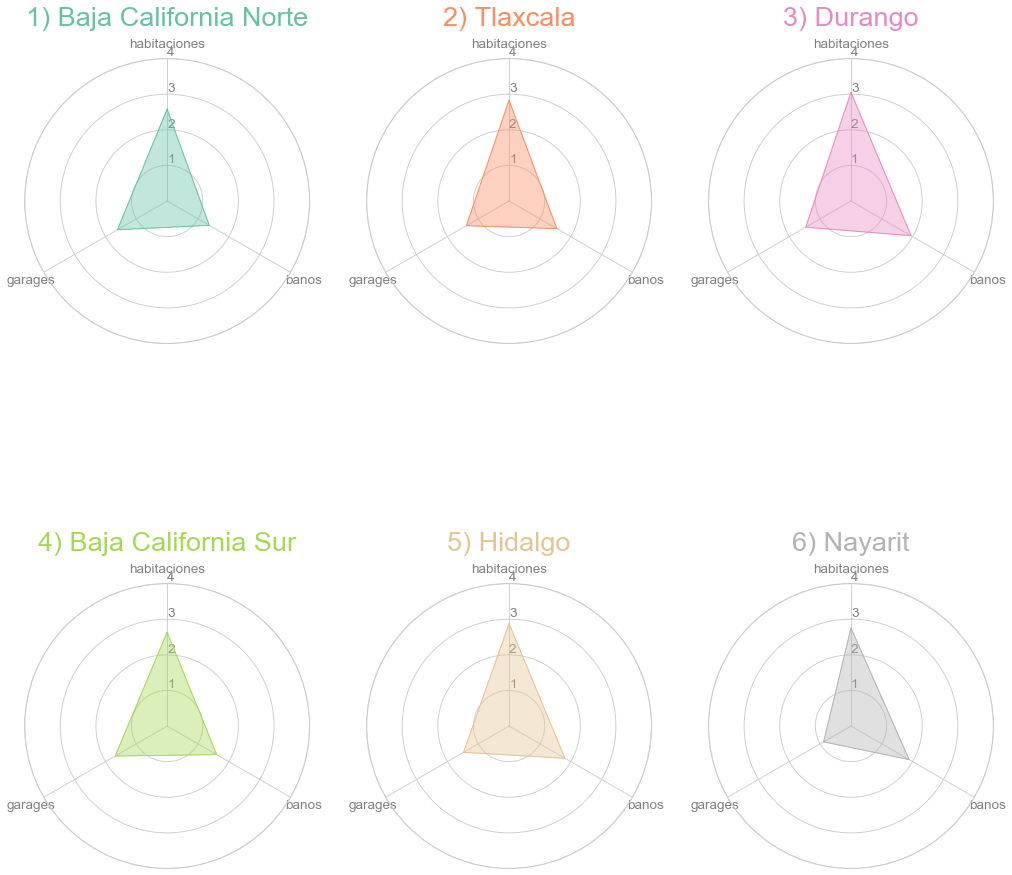

<Figure size 640x480 with 0 Axes>

In [79]:
my_dpi=65
plt.figure(figsize=(1250/my_dpi, 1250/my_dpi), dpi=my_dpi)
 
common.crear_radares_alineados(provincias_baratas_df.reset_index(), 2, 3, "Set2")

### Promedios de las caracteristicas de las provincias con más propiedades:

In [80]:
provincias_pobladas = df["provincia"].value_counts().nlargest(6)
provincias_pobladas_df = df[df["provincia"].isin(list(provincias_pobladas.index))]
provincias_pobladas_df = provincias_pobladas_df.groupby("provincia")["habitaciones", "banos", "garages"].mean()
provincias_pobladas = provincias_pobladas.to_frame()
provincias_pobladas_df = provincias_pobladas_df.merge(provincias_pobladas, how = "inner", left_index=True, right_index=True)
provincias_pobladas_df =  provincias_pobladas_df.sort_values("provincia", ascending = False)
provincias_pobladas_df = provincias_pobladas_df.drop(["provincia"], axis=1)
provincias_pobladas_df.index.name = "provincia"
provincias_pobladas_df
#df, edo, jalis, que, nueva, puebla

,habitaciones,banos,garages
provincia,,,
Distrito Federal,2.74,1.99,1.42
Edo. de México,2.97,2.08,1.66
Jalisco,3.03,2.22,1.53
Querétaro,2.98,2.40,1.75
Nuevo León,2.94,2.31,1.53
Puebla,2.92,2.25,1.66


<Figure size 640x480 with 0 Axes>

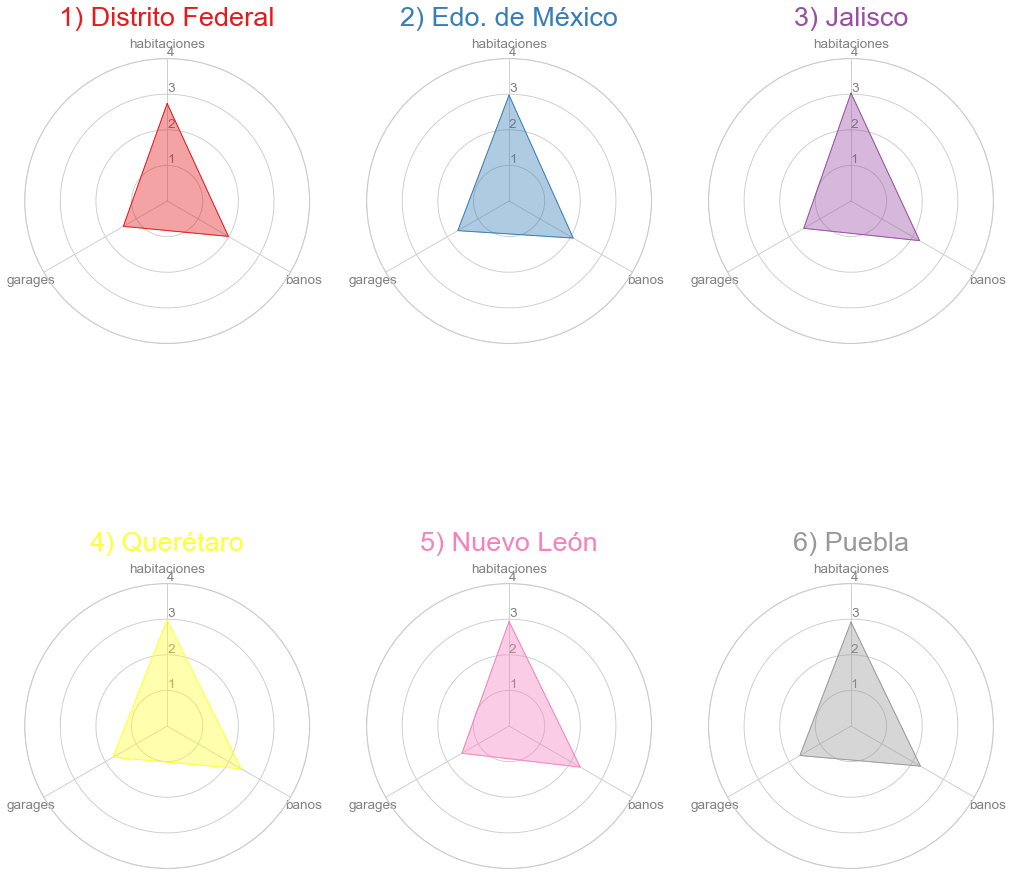

<Figure size 640x480 with 0 Axes>

In [81]:
my_dpi=65
plt.figure(figsize=(1250/my_dpi, 1250/my_dpi), dpi=my_dpi)

common.crear_radares_alineados(provincias_pobladas_df.reset_index(), 2, 3, "Set1")